In [ ]:
!pip install -Uq diffusers transformers fastcore

In [ ]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)
if not (Path.home()/'.huggingface'/'token').exists(): notebook_login()

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16).to('cuda')

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
prompt = "a photograph of astronaut riding a horse"

In [ ]:
pipe(prompt).images[0]

In [ ]:
pipe(prompt, num_inference_steps=3).images[0]

In [ ]:
torch.manual_seed(1000)
prompt = "Labrador in the style of Vermeer"
pipe(prompt).images[0]

In [ ]:
torch.manual_seed(1000)
pipe(prompt, negative_prompt="blue").images[0]

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
from fastdownload import FastDownload

In [ ]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
).to('cuda')

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


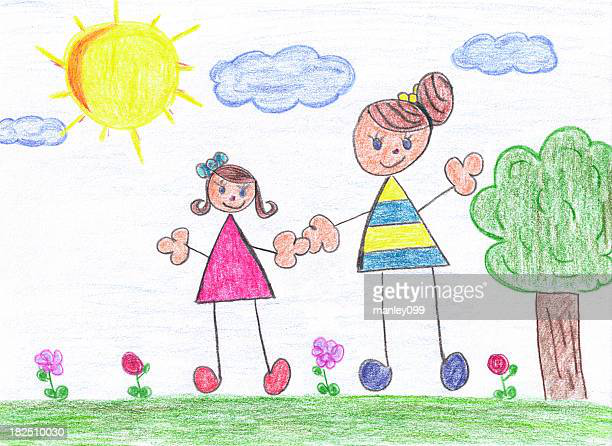

In [ ]:
p = FastDownload().download('https://media.gettyimages.com/id/182510030/vector/mom-and-daughter-drawing-outside.jpg?s=612x612&w=gi&k=20&c=34BSPzQsM8f40BNyXLJynVduI9HFsixS3gBleQT2Wh0=')
init_image = Image.open(p).convert("RGB")
init_image

In [ ]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/40 [00:00<?, ?it/s]

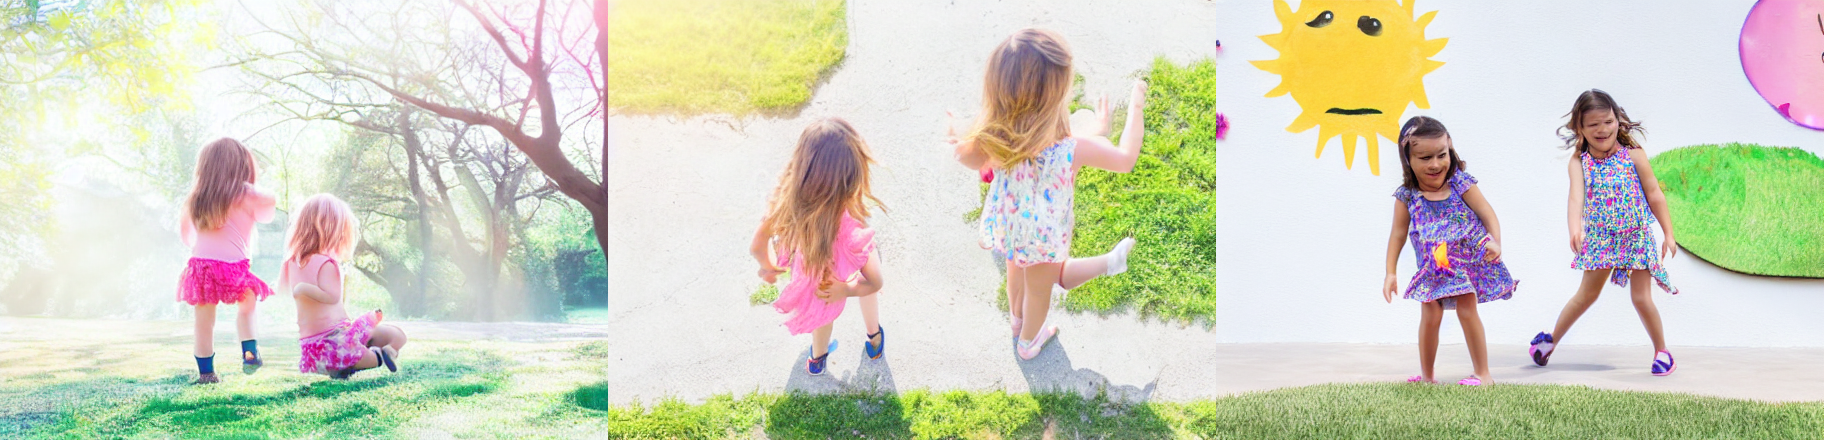

In [ ]:
torch.manual_seed(1000)
prompt = "two little girls playing in a sunny day 4k "
images = pipe(prompt=prompt, num_images_per_prompt=3, image=init_image, strength=0.8, num_inference_steps=50).images
image_grid(images, rows=1, cols=3)